In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

In [3]:
data=pd.read_csv("linear_regression_train.csv")
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,47996,3.562959,11.486509,61.145800,2.805889,-28.902789,-30.775352,-66.414021,-103.186976,-130.046256,...,-105.482960,48.452228,-0.643498,-1.883623,-80.008729,-27.849186,-92.497409,-69.854208,47.798525,3353.082152
47996,47997,-2.748224,22.360721,124.499793,-21.230197,-60.030819,-27.661729,-60.773068,-102.180412,-140.769031,...,-101.472074,-36.467914,7.985939,-30.925713,-134.529393,5.100088,-87.846292,-21.788868,9.368803,2149.681236
47997,47998,13.876292,26.976793,86.952262,-70.016487,-10.544583,-71.143920,-138.125870,-97.217351,-92.475987,...,-134.999520,4.757532,16.897211,-20.287205,-100.728629,-48.036962,-102.180933,-63.056645,109.054688,-1703.219366
47998,47999,-4.422768,19.522277,61.596420,-23.721260,-24.057237,-28.699059,-14.257085,-112.711818,-56.741174,...,-32.319919,-45.396834,-9.835818,-28.323818,-63.691619,-19.455079,-85.611697,2.956711,4.267729,4551.706842


# Visualizing the data.

2-D plot:

In [4]:
m,n=data.shape
x_show=data.iloc[:,1:2]    #extracting the first feature only.
y_show=data.iloc[:,n-1:n]   #extracting the target values.
print(x_show)
print(y_show)

       Feature_1
0     -10.429837
1      12.475081
2       7.696188
3       6.505033
4       5.906445
...          ...
47995   3.562959
47996  -2.748224
47997  13.876292
47998  -4.422768
47999   3.866060

[48000 rows x 1 columns]
            Target
0      5235.690928
1     -1221.442146
2     -1102.758862
3       437.940266
4       755.825367
...            ...
47995  3353.082152
47996  2149.681236
47997 -1703.219366
47998  4551.706842
47999 -2800.863256

[48000 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

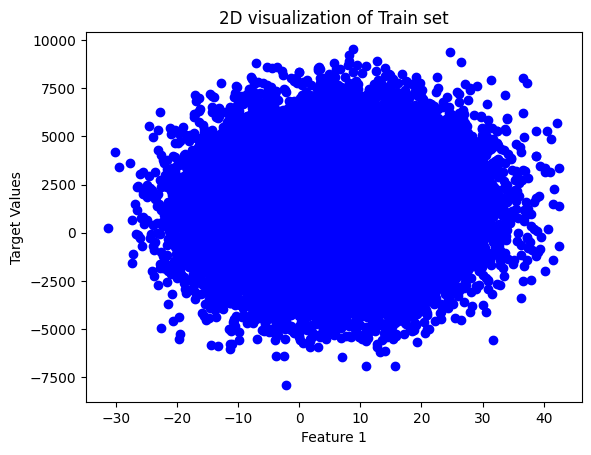

In [5]:
plt.scatter(x_show,y_show,color='blue')
plt.title("2D visualization of Train set")
plt.xlabel("Feature 1")
plt.ylabel("Target Values")
plt.show

3D plot:

In [ ]:

ax=plt.axes(projection='3d')


In [33]:
def cost(x_tr, y_tr, w, b):
    m = x_tr.shape[0]
    err = ((np.dot(x_tr, w) + b) - y_tr)**2
    total_cost = np.sum(err) / (2 * m)
    return total_cost


In [34]:
def gradient(x_tr, y_tr, w, b):
    m=x_tr.shape[0]
    predictions=np.dot(x_tr, w)+b
    errors=predictions-y_tr
    dj_dw = np.dot(x_tr.T, errors) / m  
    dj_db = np.sum(errors) / m          

    return dj_dw, dj_db


In [35]:
def grad_descent(x_tr, y_tr,alpha, iters, w_in, b_in, cost, gradient):
    j = []
    m,n = x_tr.shape
    w = w_in[:,np.newaxis]
    b = b_in
    j.append(cost(x_tr, y_tr, w,b))
    for i in range(iters):
        g1, g2 =  gradient(x_tr, y_tr, w, b)
        w = w - alpha*g1
        b = b - alpha*g2

        if i < 100000:
            j.append(cost(x_tr, y_tr, w,b))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iters/10) == 0:
            print(f"Iteration {i}: Cost {j[-1]}")
    return w,b

In [36]:
def z_score_normalization(x_tr):
    mean=np.mean(x_tr,axis=0)
    std=np.std(x_tr,axis=0)
    x_tr=(x_tr-mean)/std
    return x_tr

In [37]:
def predict(w,b, x_tr):
    return (np.dot(x_tr,w)+b)

In [38]:
#main function
#defining the hyperparameters
data =  pd.read_csv("linear_regression_train.csv")
m,n = data.shape
x = data.iloc[:,1:n-1].to_numpy()
y = data.iloc[:,n-1:n].to_numpy()
x_tr=z_score_normalization(x)
y_tr=z_score_normalization(y)
iters = 10000
alpha = 0.01
w_in = np.zeros(x_tr.shape[1])
b_in = 0

w_fin, b_fin = grad_descent(x_tr, y_tr,alpha, iters, w_in, b_in, cost, gradient)
print(f"w,b found by gradient descent are: {w_fin},{b_fin}")

prediction  = predict(w_fin, b_fin, x_tr)
for i in range(x_tr.shape[0]):
    print(f"prediction: {prediction[i]}, target: {y_tr[i]}")

Iteration 0: Cost 0.49037298022405884
Iteration 1000: Cost 0.01247486629366951
Iteration 2000: Cost 0.012474865173274044
Iteration 3000: Cost 0.012474865173274043
Iteration 4000: Cost 0.012474865173274043
Iteration 5000: Cost 0.012474865173274043
Iteration 6000: Cost 0.012474865173274043
Iteration 7000: Cost 0.012474865173274043
Iteration 8000: Cost 0.012474865173274043
Iteration 9000: Cost 0.012474865173274043
w,b found by gradient descent are: [[ 6.04846943e-02]
 [ 2.92518515e-04]
 [ 2.42380570e-01]
 [ 3.40949781e-01]
 [-1.96358011e-04]
 [ 3.76162014e-01]
 [ 2.05030594e-01]
 [-4.66508368e-04]
 [ 3.00078889e-01]
 [ 1.04401955e-01]
 [ 3.64884810e-04]
 [ 1.34659982e-04]
 [ 3.53354591e-01]
 [ 3.07046267e-01]
 [-6.58343652e-04]
 [ 2.44529357e-01]
 [ 1.46822569e-02]
 [ 2.09696068e-01]
 [ 1.91256175e-01]
 [ 3.22125442e-01]
 [ 4.48744191e-02]
 [ 5.37280403e-04]
 [ 4.89108436e-02]
 [ 2.28134212e-01]
 [ 3.73121280e-04]],3.469582029087325e-16
prediction: [1.66769936], target: [1.84941371]
predi